<a href="https://colab.research.google.com/github/Karam2006-dev/CSE408/blob/main/Outlier_Dection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('placement.csv')

df.sample(5)

,cgpa,placement_exam_marks,placed
924,6.85,23.0,1
654,7.03,76.0,0
736,6.86,24.0,1
102,5.92,22.0,1
887,7.19,17.0,1


In [6]:
df.shape

(1000, 3)

/tmp/ipython-input-3667791092.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'],kde=True)


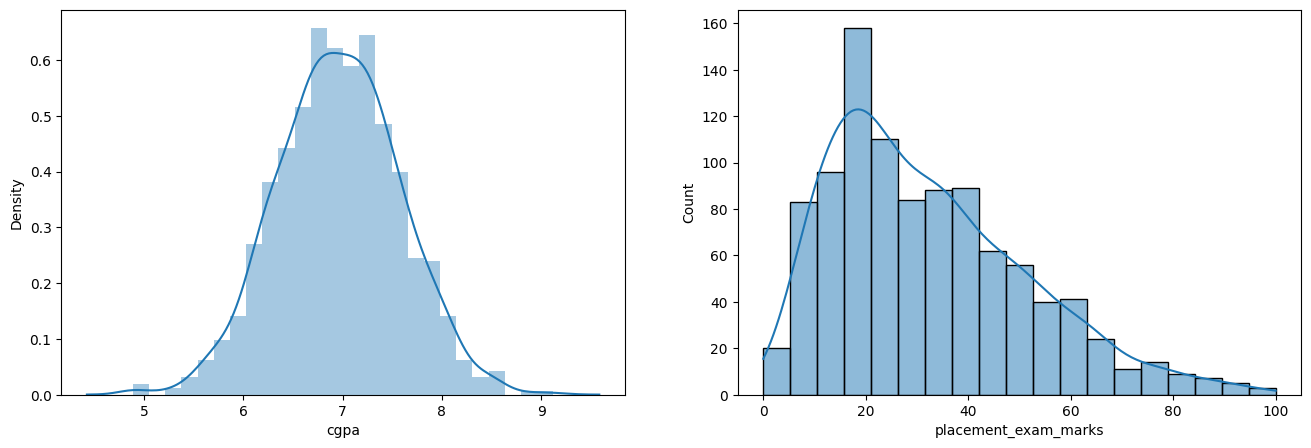

In [9]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'],kde=True)
plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'],kde=True)
plt.show()

In [11]:
df['cgpa'].skew()

np.float64(-0.014529938929314918)

In [12]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [13]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())


Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


In [16]:
print("Highest allowed",df['cgpa'].mean()+3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean()-3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [19]:
df[(df['cgpa']>8.80)|(df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [20]:
# Outlier removal Methods
#Trimming
new_df=df[(df['cgpa']>8.80)|(df['cgpa']<5.11)]
new_df

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [22]:
#Capping
upper_limit=df['cgpa'].mean()+3*df['cgpa'].std()
lower_limit=df['cgpa'].mean()-3*df['cgpa'].std()
print(upper_limit)
print(lower_limit)

8.808933625397168
5.113546374602832


In [23]:
df['cgpa']=np.where(df['cgpa']>upper_limit,upper_limit,
                    np.where(df['cgpa']<lower_limit,lower_limit,df['cgpa']))

In [25]:
df.shape

(1000, 3)

In [26]:
df['cgpa'].describe()

,cgpa
count,1000.000000
mean,6.961499
std,0.612688
min,5.113546
25%,6.550000
50%,6.960000
75%,7.370000
max,8.808934


In [28]:
df.to_csv('cleaned_data.xlsx',index=False)